# Generlized Linear Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file in

In [7]:
# importing bikes dataset
bikes = pd.read_csv("ny_bikes.csv", index_col=0)
bikes.head()

,Date,Day,High Temp (Â°F),Low Temp (Â°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [25]:
bikes.rename(columns={"High Temp (Â°F)":"High Temp", "Low Temp (Â°F)":"Low Temp"}, inplace=True)

In [8]:
bikes.dtypes

Date                    object
Day                     object
High Temp (Â°F)        float64
Low Temp (Â°F)         float64
Precipitation           object
Brooklyn Bridge        float64
Manhattan Bridge         int64
Williamsburg Bridge    float64
Queensboro Bridge      float64
Total                    int64
dtype: object

In [12]:
bikes.isnull().values.any()

False

In [13]:
bikes["Total"].describe()

count      210.000000
mean     14534.500000
std       5569.173496
min       4335.000000
25%       9596.000000
50%      15292.500000
75%      18315.000000
max      23318.000000
Name: Total, dtype: float64

Skewness: -0.242981
Kurtosis: -0.907534


/Users/zacharyargentin/opt/anaconda3/envs/bootcamp/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


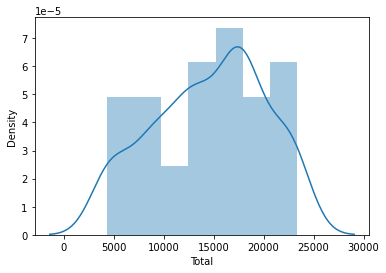

In [16]:
# checking the distribution to see if there are any outliers
sns.distplot(bikes['Total']);

#skewness and kurtosis
print("Skewness: %f" % bikes['Total'].skew())
print("Kurtosis: %f" % bikes['Total'].kurt())

In [27]:
bikes['Average Temp'] = (bikes['High Temp'] + bikes['Low Temp'])/2

/Users/zacharyargentin/opt/anaconda3/envs/bootcamp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


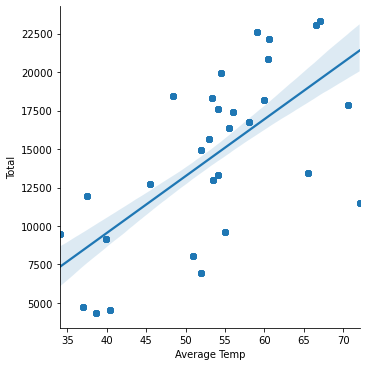

In [28]:
# plotting average temperature against total number of bikes 
# linear regression
sns.lmplot('Average Temp', 'Total', data=bikes)

In [29]:
# since I am predicting a count value, I should fit a poisson regression. 
import statsmodels.api as sm

X = bikes['Average Temp']
y = bikes['Total']

# add intercept to input variable
X = sm.add_constant(X)

# fit poisson regression model 
model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# add poisson fitted values to dataframe
bikes['reg_fit'] = model.fittedvalues

/Users/zacharyargentin/opt/anaconda3/envs/bootcamp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


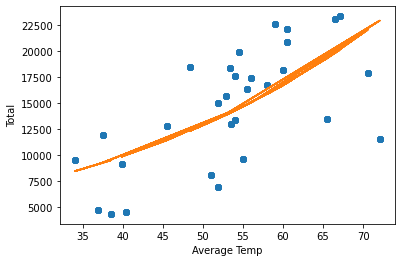

In [30]:
# plot & add a regression line
sns.regplot(bikes['Average Temp'], bikes['Total'], fit_reg=False)
plt.plot(bikes['Average Temp'], bikes['reg_fit']);